In [1]:
from keras import models
from keras import layers
import numpy as np
import math
import json

Using TensorFlow backend.
D:\MyCode\Anaconda\envs\AiMusic\lib\site-packages\tensorflow\python\framework\dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
D:\MyCode\Anaconda\envs\AiMusic\lib\site-packages\tensorflow\python\framework\dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
D:\MyCode\Anaconda\envs\AiMusic\lib\site-packages\tensorflow\python\framework\dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
D:\MyCode\Anaconda\envs\AiMusic\lib\site-packages\tensorflo

In [2]:
model = models.Sequential()
model.add(layers.Dense(32,activation='relu',input_shape=(800,)))
model.add(layers.Dense(64,activation='relu',input_shape=(800,)))
model.add(layers.Dense(45,activation='softmax'))

In [3]:
model.compile(optimizer='rmsprop',
             loss='categorical_crossentropy',
             metrics=['accuracy'])

In [4]:
obj_r=open("./test/json/datasetx_train2.json")
obj_r2 = open("./test/json/datasetx_result2.json")
input_train = json.load(obj_r)
input_train = np.array(input_train)
print(len(input_train))
y = json.load(obj_r2)
y = np.array(y)
y = y*2093.004

obj_r=open("./test/json/datasetx_train1.json")
obj_r2 = open("./test/json/datasetx_result1.json")
test = json.load(obj_r)
test = np.array(test)
t = json.load(obj_r2)
print(len(test))
t = np.array(t)
t = t*2093.004

756
255


In [5]:
def fre_to_note_piano(fre):
    index = round(math.log(fre / 27.5,2**(1/12)))
    dict = ["A1 ","#A1 ","B1 ","C2 ","#C2 ","D2 ","#D2 ","E2 ","F2 ","#F2 ","G2 ","#G2 ","A2 ","#A2 ","B2 ","C3 ","#C3 ","D3 ","#D3 ","E3 ","F3 ","#F3 ","G3 ","#G3 ","A3 ","#A3 ","B3 ","C4 ","#C4 ","D4 ","#D4 ","E4 ","F4 ","#F4 ","G4 ","#G4 ","A4 ", "#A4 ", "B4 ", "C5 ", "#C5 ", "D5 ", "#D5 ", "E5 ","F5 ","#F5 ","G5 ","#G5 ","A5 ", "#A5 ", "B5 ", "C6 ", "#C6 ", "D6 ", "#D6 ", "E6 ",
    "F6 ","#F6 ","G6 ","#G6 ","A6 ", "#A6 ", "B6 ", "C7 ", "#C7 ", "D7 ", "#D7 ", "E7 ","F7 ","#F7 ","G7 ","#G7 ","A7 ", "#A7 ", "B7 ", "C8 ","#C8 ","D8 ","#D8 ","E8 ","F8 ","#F8 ","G8 ","#G8 ","A8 ","#A8 ","B8 ","C9 ","#C9 ", "D9 ", "#D9 ", "E9 ","F9 ","#F9 ","G9 ","#G9 ","A9 ", "#A9 ", "B9 ", "C10 "]
    return index+21
y_train = np.zeros((len(y),45))
test_standard = []
for i in range(len(y)):
    index = fre_to_note_piano(y[i])
    y_train[i][index-40] = 1

for j in range(len(t)):
    index = fre_to_note_piano(t[j])
    test_standard.append(index)



In [6]:
history=model.fit(input_train,y_train,batch_size=2,epochs=300)

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where

Epoch 1/300
756/756 [==============================] - 2s 3ms/step - loss: 3.6327 - acc: 0.1812
Epoch 2/300
756/756 [==============================] - 0s 588us/step - loss: 2.5630 - acc: 0.4788
Epoch 3/300
756/756 [==============================] - 0s 588us/step - loss: 1.3306 - acc: 0.7513
Epoch 4/300
756/756 [==============================] - 0s 575us/step - loss: 0.6652 - acc: 0.8968
Epoch 5/300
756/756 [==============================] - 0s 602us/step - loss: 0.4264 - acc: 0.9127
Epoch 6/300
756/756 [==============================] - 0s 538us/step - loss: 0.3017 - acc: 0.9444
Epoch 7/300
756/756 [==============================] - 0s 549us/step - loss: 0.2477 - acc: 0.9444
Epoch 8/300
756/756 [==============================] - 0s 604us/step - loss: 0.2027 - acc: 0.9563
Epoch 9/300
756/756 [==============================] - 1s 684us/step - loss: 0.1860 - acc: 0.9563
Epoch 10/300
756/756 [===

756/756 [==============================] - 0s 534us/step - loss: 0.0464 - acc: 0.9960
Epoch 79/300
756/756 [==============================] - 0s 565us/step - loss: 0.0448 - acc: 0.9960
Epoch 80/300
756/756 [==============================] - 0s 565us/step - loss: 0.0449 - acc: 0.9960
Epoch 81/300
756/756 [==============================] - 0s 551us/step - loss: 0.0447 - acc: 0.9960
Epoch 82/300
756/756 [==============================] - 0s 559us/step - loss: 0.0437 - acc: 0.9960
Epoch 83/300
756/756 [==============================] - 0s 573us/step - loss: 0.0444 - acc: 0.9960
Epoch 84/300
756/756 [==============================] - 0s 567us/step - loss: 0.0476 - acc: 0.9960
Epoch 85/300
756/756 [==============================] - 0s 559us/step - loss: 0.0448 - acc: 0.9960
Epoch 86/300
756/756 [==============================] - 0s 565us/step - loss: 0.0429 - acc: 0.9974
Epoch 87/300
756/756 [==============================] - 0s 569us/step - loss: 0.0444 - acc: 0.9960
Epoch 88/300
756/756 [=

Epoch 160/300
756/756 [==============================] - 0s 561us/step - loss: 0.0427 - acc: 0.9974
Epoch 161/300
756/756 [==============================] - 0s 528us/step - loss: 0.0426 - acc: 0.9974
Epoch 162/300
756/756 [==============================] - 0s 532us/step - loss: 0.0427 - acc: 0.9974
Epoch 163/300
756/756 [==============================] - 0s 554us/step - loss: 0.0427 - acc: 0.9974
Epoch 164/300
756/756 [==============================] - 0s 544us/step - loss: 0.0427 - acc: 0.9974
Epoch 165/300
756/756 [==============================] - 0s 527us/step - loss: 0.0427 - acc: 0.9974
Epoch 166/300
756/756 [==============================] - 0s 530us/step - loss: 0.0426 - acc: 0.9974
Epoch 167/300
756/756 [==============================] - 0s 532us/step - loss: 0.0427 - acc: 0.9974
Epoch 168/300
756/756 [==============================] - 0s 533us/step - loss: 0.0427 - acc: 0.9974
Epoch 169/300
756/756 [==============================] - 0s 532us/step - loss: 0.0427 - acc: 0.9974


756/756 [==============================] - 0s 586us/step - loss: 0.0426 - acc: 0.9974
Epoch 242/300
756/756 [==============================] - 0s 554us/step - loss: 0.0426 - acc: 0.9974
Epoch 243/300
756/756 [==============================] - 0s 594us/step - loss: 0.0426 - acc: 0.9974
Epoch 244/300
756/756 [==============================] - 0s 581us/step - loss: 0.0426 - acc: 0.9974
Epoch 245/300
756/756 [==============================] - 0s 566us/step - loss: 0.0426 - acc: 0.9974
Epoch 246/300
756/756 [==============================] - 0s 538us/step - loss: 0.0426 - acc: 0.9974
Epoch 247/300
756/756 [==============================] - 0s 533us/step - loss: 0.0426 - acc: 0.9974
Epoch 248/300
756/756 [==============================] - 0s 558us/step - loss: 0.0426 - acc: 0.9974
Epoch 249/300
756/756 [==============================] - 0s 536us/step - loss: 0.0426 - acc: 0.9974
Epoch 250/300
756/756 [==============================] - 0s 537us/step - loss: 0.0426 - acc: 0.9974
Epoch 251/300


In [7]:
predict = model.predict(test)
predict_note = []
for i in range(len(predict)):
    index = np.argmax(predict[i])
    predict_note.append(index+40)

num = 0
wrong_num = 0
for i in range(len(predict_note)):
    if abs(predict_note[i] - test_standard[i])==0:
        num += 1
    else:
        wrong_num += 1
accuracy = num/len(predict_note)
print(predict_note)
print(test_standard)
dis = []
for i in range(len(predict_note)):
    dis.append(abs(predict_note[i] - test_standard[i]))
print(dis)
print("总量：",len(predict_note),"错误量：",wrong_num)
print("正确率：",accuracy)

[66, 70, 68, 45, 64, 61, 77, 74, 64, 67, 41, 53, 81, 42, 68, 50, 46, 71, 76, 65, 64, 44, 56, 77, 41, 62, 42, 76, 51, 60, 65, 58, 73, 72, 55, 48, 71, 80, 67, 73, 40, 75, 62, 82, 56, 76, 52, 65, 66, 68, 41, 74, 46, 51, 61, 63, 41, 42, 44, 57, 82, 49, 60, 75, 51, 42, 76, 72, 53, 61, 83, 76, 44, 77, 49, 60, 72, 50, 44, 73, 75, 51, 69, 60, 56, 68, 74, 53, 63, 40, 51, 44, 42, 67, 42, 62, 46, 51, 52, 82, 73, 67, 69, 80, 80, 74, 73, 61, 42, 74, 74, 60, 71, 45, 45, 76, 53, 84, 40, 84, 49, 84, 70, 54, 76, 77, 61, 48, 45, 77, 71, 51, 58, 77, 67, 82, 45, 51, 69, 56, 77, 69, 47, 57, 45, 66, 70, 43, 43, 57, 40, 52, 83, 44, 46, 73, 54, 52, 60, 83, 68, 54, 54, 80, 70, 83, 61, 80, 48, 57, 50, 63, 64, 59, 62, 40, 54, 76, 57, 67, 54, 59, 63, 80, 40, 62, 82, 50, 81, 68, 57, 84, 54, 71, 78, 48, 62, 83, 71, 55, 46, 61, 56, 63, 51, 83, 77, 77, 49, 43, 70, 60, 43, 51, 62, 63, 49, 59, 46, 50, 71, 63, 53, 43, 50, 77, 58, 69, 71, 50, 46, 72, 68, 68, 52, 75, 75, 72, 84, 80, 58, 41, 57, 65, 55, 64, 74, 56, 79, 74,

dict_keys(['loss', 'acc'])


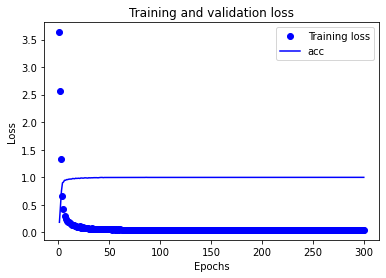

In [8]:
import matplotlib.pyplot as plt
history_dict = history.history
loss_values = history_dict['loss']
print(history_dict.keys())

acc = history_dict['acc']
epochs = range(1, len(loss_values) + 1)
plt.plot(epochs, loss_values, 'bo', label='Training loss')
plt.plot(epochs, acc, 'b', label='acc')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()